In [1]:
gene_location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics"

species_list = ["1.Lasiomatta_megera","2.Pieris_napi","3.Pararge_aegeria"]

gene_list = []

for species in species_list:
    with open(f"{gene_location}/{species}/4.Intersections_test/Complete_BUSCO_intersection_set.txt", 'r') as intersection_list:
        for gene_line in intersection_list:
            gene_name = gene_line.split(",")[0]
            if gene_name not in gene_list:
                gene_list.append(gene_name)
    print(len(gene_list))
        

704
996
1443


In [2]:
gene_list_dictionary = {}
for gene_name in gene_list:
    gene_list_dictionary[gene_name] = ["0","0","0"]

In [4]:
for i,species in enumerate(species_list):
    with open(f"{gene_location}/{species}/4.Intersections_test/Complete_BUSCO_intersection_set.txt", 'r') as intersection_list:
        for gene_line in intersection_list:
            gene_name = gene_line.split(",")[0]
            gene_list_dictionary[gene_name][i] = "1"

In [10]:
print(gene_list_dictionary)

{'VRK1': ['1', '0', '1'], 'ZNHIT1': ['1', '0', '0'], 'URM1': ['1', '0', '0'], 'NUDT2': ['1', '0', '0'], 'SLC6A19': ['1', '0', '0'], 'GBF1': ['1', '0', '0'], 'PRMT7': ['1', '0', '0'], 'PRPF31': ['1', '0', '0'], '821at7088': ['1', '1', '1'], 'SF3B3': ['1', '0', '0'], 'CCDC93': ['1', '0', '0'], 'CSDE1': ['1', '0', '0'], 'ANKMY2': ['1', '0', '0'], 'IST1': ['1', '0', '0'], 'PPRC1': ['1', '0', '0'], 'RQCD1': ['1', '0', '0'], '12090at7088': ['1', '0', '1'], 'UBE2G2': ['1', '1', '0'], 'POLR1A': ['1', '0', '0'], 'UBE2I': ['1', '0', '0'], 'EXOSC1': ['1', '0', '0'], 'mad2': ['1', '0', '0'], 'USP38': ['1', '0', '1'], '5679at7088': ['1', '0', '1'], 'HGH1': ['1', '0', '0'], 'CARM1': ['1', '0', '1'], 'SUGCT': ['1', '0', '0'], 'LYPLAL1': ['1', '0', '0'], 'ACTR8': ['1', '0', '0'], 'HLF': ['1', '1', '0'], 'GDAP2': ['1', '0', '0'], 'PDE7B': ['1', '0', '1'], '2003at7088': ['1', '0', '0'], 'SIRT2': ['1', '0', '0'], 'GPSM2': ['1', '1', '0'], 'KDM2A': ['1', '0', '0'], 'cycle': ['1', '0', '0'], 'COPB2': ['1',

In [5]:
output = "Gene,Lasiomatta_megera,Pieris_napi,Pararge_aegeria"

for key,value in gene_list_dictionary.items():
    count = ",".join(value)
    output += f"\n{key},{count}"
    # print(output)
with open("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/9.Upset_plot_BUSCO/counts.csv", 'w') as out_file:
    out_file.write(output)

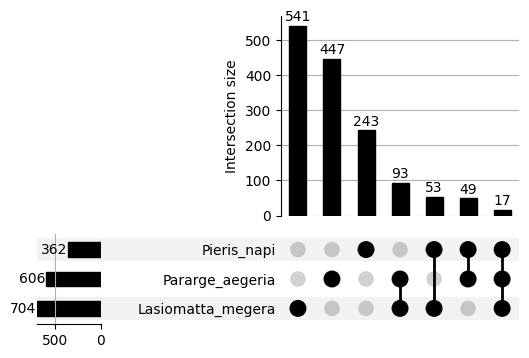

In [6]:
import pandas as pd
from upsetplot import from_indicators, UpSet
import matplotlib.pyplot as plt

# Step 1: Load your data
df = pd.read_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/9.Upset_plot_BUSCO/counts.csv")  # Replace with your actual file path

# Step 2: Set the 'Gene' column as index (optional but recommended)
df.set_index("Gene", inplace=True)

df = df.astype(bool)


# Step 3: Convert to UpSet-compatible format
upset_data = from_indicators(data=df, indicators=df.columns.tolist())

# Step 4: Create and show the plot
upset = UpSet(upset_data, show_counts=True)
upset.plot()
plt.show()